# Slicing the LCH space
---
This notebook is part 4/5 of a tutorial based on the [```colourspace```](https://github.com/gillesferrand/colourspace) package.<br>
Note that running it entirely will take some time.

In [1]:
from colourspace import slices

convertor = ' custom '


The ```slices``` module allows us to slice the LCH space along its principal axes, to get a better intuition of its structure.

For any slice we make in the LCH space, we can use the conversion functions from ```convert``` to convert them to the RGB space, in which we can display them.<br>
Knowing the gamut boundaries, of the display ("sRGB"), and of humans ("full"), as explained in the previous notebooks using ```gamut```, we can properly deal with out-of-gamut colours that may happen. (The resolution used for the tabulated gamuts is controlled by module parameter ```res_gamut```.) <br>
When a colour is outside the human gamut, it is replaced with black. <br>
When a colour is outside the sRGB gamut:<br>
\- for ```mode='crop'``` the colour is discarded: it is replaced with a gray of the same L<br>
\- for ```mode='clip'``` the colour is faked: the R,G,B values are clipped to [0,1]<br>
The latter mode produces more vivid colours, but there are uncontrolled L, C, H shifts, only the former mode can produce correct slices. Images for both modes are generated, and by default both are plotted and written to disk.

We will slice the space along its three principal axes, using the functions<br>
```LH_plane(C)```<br>
```CH_plane(L)```<br>
```LC_plane(H)```<br>
Function ```IJ_plane(K)``` returns the IJ plane at constant K, as a NumPy array. For each of these is also provided a convenience function ```IJ_planes(K)``` which generates all the planes for a given range of a K.<br>
LH planes will also be generated for the max possible C.<br>
CH planes and LC planes will also be generated with C stretched to the Cmax.<br>
Function ```all_planes()``` generates all of these.

In [2]:
%matplotlib inline

In [3]:
plot_dir = "./slices"

## LH slice for a given C

In [4]:
figsize = (12,12/3.6)

This is the surface of a cylinder of radius C, that we display here unfolded.

loading gamut from /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full.npy
L = 100.00, C =  20.00, H = 360.00
writing ./slices/LHplane_crop_axon_C020.png
L = 100.00, C =  40.00, H = 360.00
writing ./slices/LHplane_crop_axon_C040.png
L = 100.00, C =  60.00, H = 360.00
writing ./slices/LHplane_crop_axon_C060.png
L = 100.00, C =  80.00, H = 360.00
writing ./slices/LHplane_crop_axon_C080.png
L = 100.00, C = 100.00, H = 360.00
writing ./slices/LHplane_crop_axon_C100.png
L = 100.00, C = 120.00, H = 360.00
writing ./slices/LHplane_crop_axon_C120.png
CPU times: user 3.83 s, sys: 612 ms, total: 4.45 s
Wall time: 4.81 s


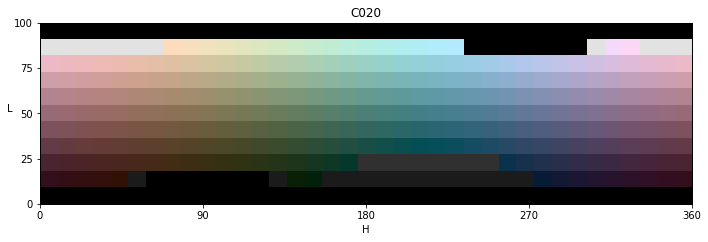

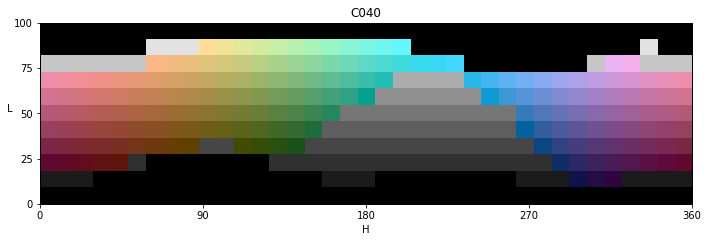

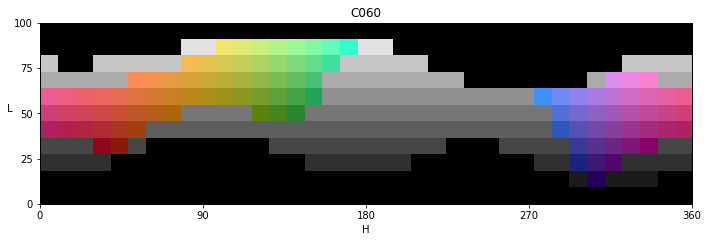

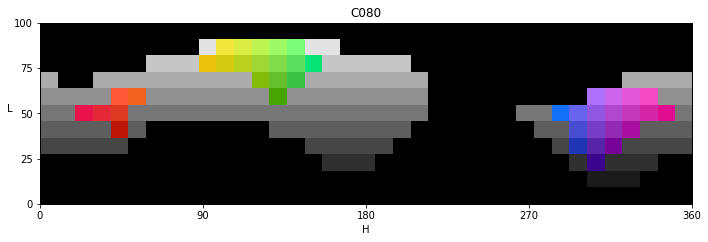

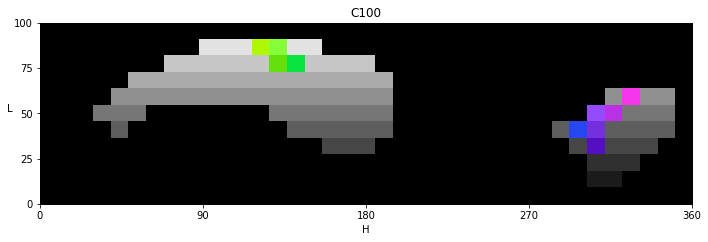

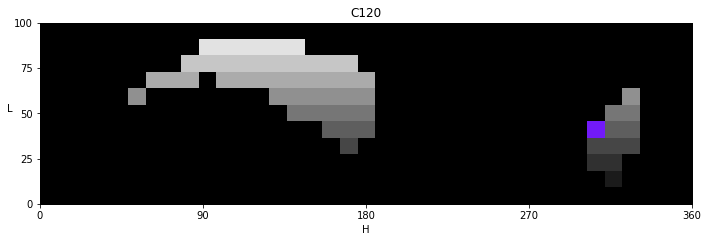

In [5]:
%time slices.LH_planes(C=np.linspace(20,120,6),L=[0,100],H=[0,360],res=0.1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dir=plot_dir)

We can fill-in the missing colours (grayed-out regions) by clipping the RGB values into gamut (but then we no longer control the actual values of L,C,H at each pixel).

L = 100.00, C =  50.00, H = 360.00
writing ./slices/LHplane_crop_axon_C050.png
writing ./slices/LHplane_clip_axon_C050.png
CPU times: user 980 ms, sys: 130 ms, total: 1.11 s
Wall time: 1.3 s


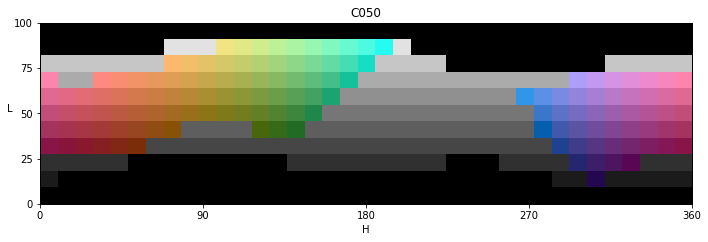

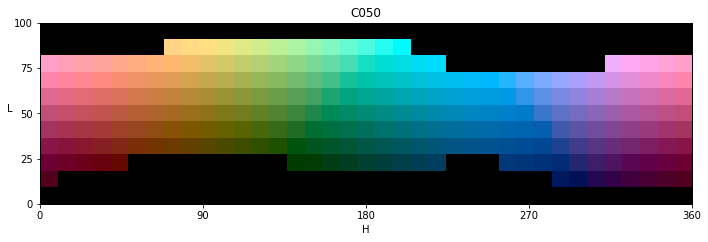

In [6]:
%time arr = slices.LH_plane(C=50,L=[0,100],H=[0,360],res=0.1,axes=['on'],figsize=figsize,dir=plot_dir)

Note that, at low resolution, the Mach banding effect is clearly visible: the edges of rows at different L show spurious gradients in L.<br>By increasing the resolution we get a continous looking image (although technically, CIE Lab and LCH spaces are low-spatial frequency models: they do not take into account the interplay between distinct nearby colours).

L = 100.00, C =  50.00, H = 360.00
writing ./slices/LHplane_crop_axon_C050.png
writing ./slices/LHplane_clip_axon_C050.png
CPU times: user 29.5 s, sys: 4.47 s, total: 34 s
Wall time: 42.3 s


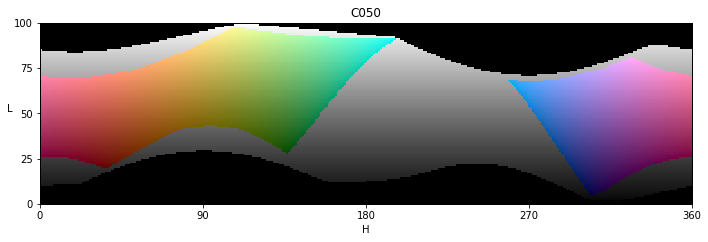

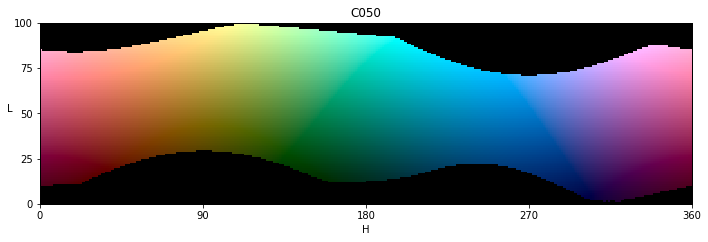

In [7]:
%time arr = slices.LH_plane(C=50,L=[0,100],H=[0,360],res=1,axes=['on'],figsize=figsize,dir=plot_dir)

### LH at Cmax

We can map the entire LH plane, at Cmax (defined per pixel or per row).

Maximum C for each (H,L) independently:

loading gamut from /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_sRGB.npy
L = 100.00, C =   0.00, H = 360.00
writing ./slices/LHplane_crop_axon_Cmaxmax.png
CPU times: user 1.49 s, sys: 198 ms, total: 1.69 s
Wall time: 2.01 s


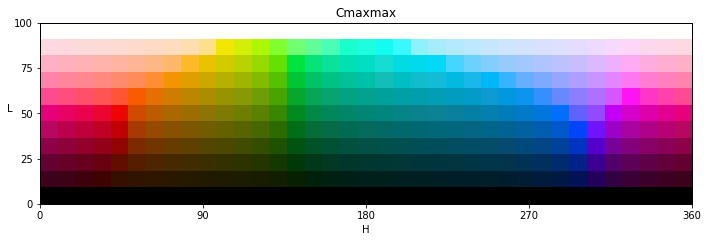

In [8]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=0.1,kinds=['max'],modes=['crop'],axes=['on'],figsize=figsize,dir=plot_dir)

L = 100.00, C =   0.00, H = 360.00
writing ./slices/LHplane_crop_axon_Cmaxmax.png
CPU times: user 1min 55s, sys: 17.8 s, total: 2min 13s
Wall time: 2min 40s


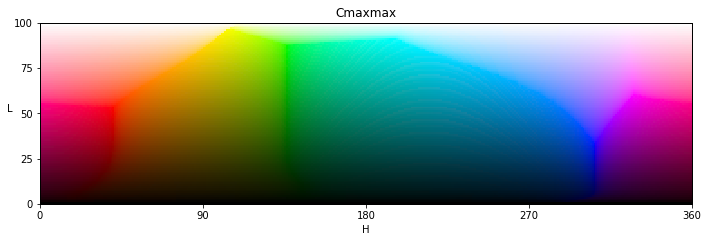

In [9]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=1,kinds=['max'],modes=['crop'],axes=['on'],figsize=figsize,dir=plot_dir)

Maximum C that accomodates all H at a given L:

L = 100.00, C =   0.00, H = 360.00
writing ./slices/LHplane_crop_axon_Cmaxequ.png
CPU times: user 1.64 s, sys: 269 ms, total: 1.91 s
Wall time: 2.28 s


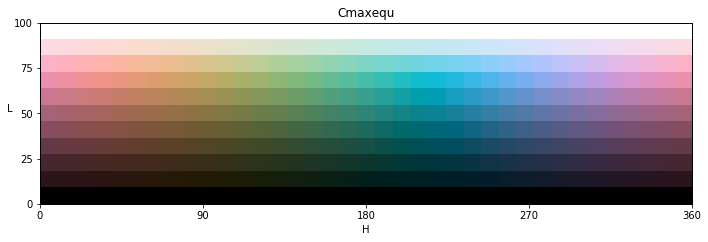

In [10]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=0.1,kinds=['equ'],modes=['crop'],axes=['on'],figsize=figsize,dir=plot_dir)

Each row is the most possible uniform rainbow that can be generated at that L.

L = 100.00, C =   0.00, H = 360.00
writing ./slices/LHplane_crop_axon_Cmaxequ.png
CPU times: user 1min 56s, sys: 17.9 s, total: 2min 14s
Wall time: 2min 46s


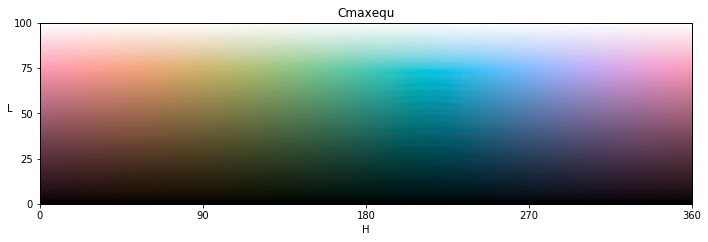

In [11]:
%time arr = slices.LH_plane_max(L=[0,100],H=[0,360],res=1,kinds=['equ'],modes=['crop'],axes=['on'],figsize=figsize,dir=plot_dir)

## CH slice for a given L

In [12]:
figsize = (8,8*2/3.6)

L =  20.00, C = 200.00, H = 360.00
writing ./slices/CHplane_crop_axon_L020.png
L =  40.00, C = 200.00, H = 360.00
writing ./slices/CHplane_crop_axon_L040.png
L =  60.00, C = 200.00, H = 360.00
writing ./slices/CHplane_crop_axon_L060.png
L =  80.00, C = 200.00, H = 360.00
writing ./slices/CHplane_crop_axon_L080.png
CPU times: user 3.29 s, sys: 534 ms, total: 3.83 s
Wall time: 4.28 s


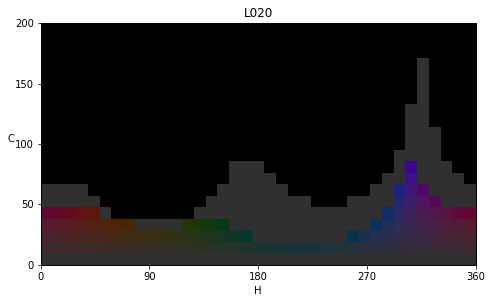

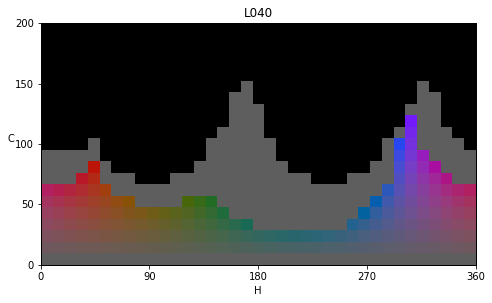

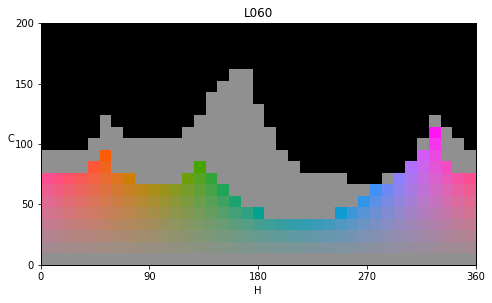

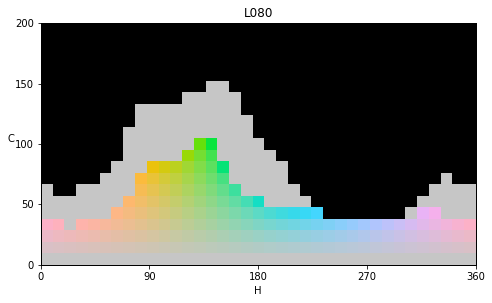

In [13]:
%time slices.CH_planes(L=np.linspace(20,80,4),C=[0,200],H=[0,360],res=0.1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dir=plot_dir)

Filling-in missing colours

L =  50.00, C = 200.00, H = 360.00
writing ./slices/CHplane_crop_axon_L050.png
writing ./slices/CHplane_clip_axon_L050.png
CPU times: user 1.15 s, sys: 173 ms, total: 1.32 s
Wall time: 1.5 s


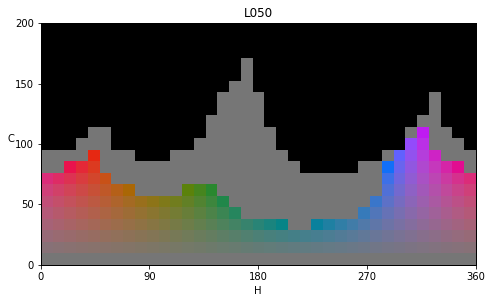

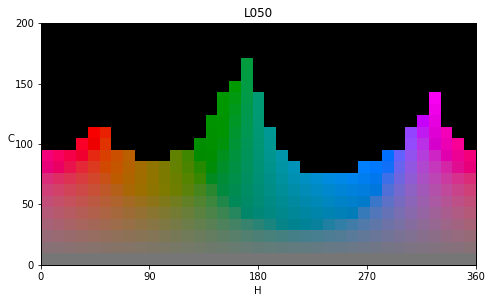

In [14]:
%time arr = slices.CH_plane(L=50,C=[0,200],H=[0,360],res=0.1,modes=['crop','clip'],axes=['on'],figsize=figsize,dir=plot_dir)

Increasing the resolution

L =  50.00, C = 200.00, H = 360.00
writing ./slices/CHplane_crop_axon_L050.png
writing ./slices/CHplane_clip_axon_L050.png
CPU times: user 53.7 s, sys: 8.72 s, total: 1min 2s
Wall time: 1min 17s


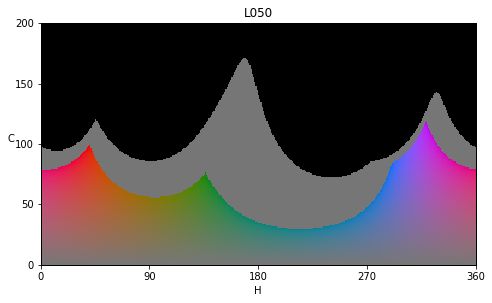

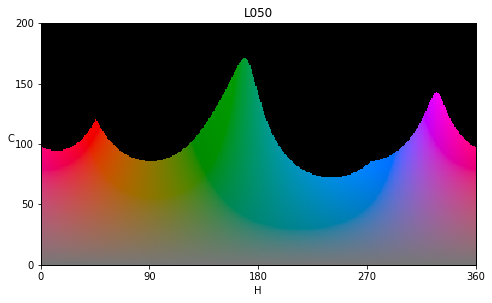

In [15]:
%time arr = slices.CH_plane(L=50,C=[0,200],H=[0,360],res=1,modes=['crop','clip'],axes=['on'],figsize=figsize,dir=plot_dir)

### Stretched to Cmax

These shapes may be stretched to fill square patches, by normalizing C to the Cmax at each L (when ```stretch=True``` parameter ```C``` is expressed as a percentage).

L =  50.00, C =  97.54, H = 360.00
writing ./slices/CHplane_stretch_crop_axon_L050.png
writing ./slices/CHplane_stretch_clip_axon_L050.png
CPU times: user 55.3 s, sys: 9.04 s, total: 1min 4s
Wall time: 1min 19s


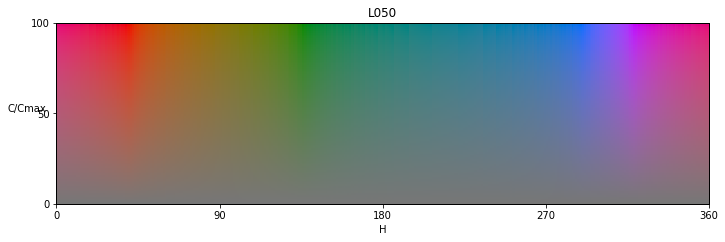

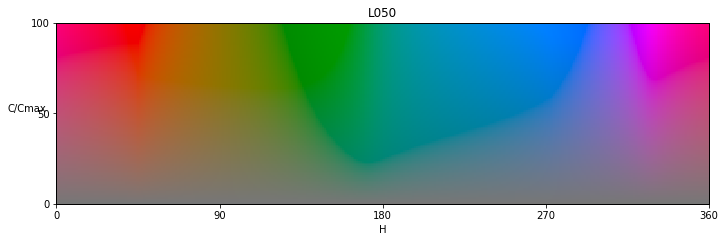

In [16]:
figsize = (12,12*1/3.6)
%time arr = slices.CH_plane(L=50,C=[0,100],stretch=True,H=[0,360],res=1,modes=['crop','clip'],axes=['on'],figsize=figsize,dir=plot_dir)

This is the approach taken for the proposed ["HSL_uv" model](http://www.hsluv.org/comparison/) (for what is called here ```mode='crop'```). This leads to variations in C and L accross the image, the advantage being that the three axes lightness, chroma, hue can be set independently, which makes it easier to pick up colours.

## LC slice for a given H

In [17]:
figsize = (8,8*2/3.6)

L = 100.00, C = 200.00, H =   0.00
writing ./slices/LCplane_crop_axon_H000.png
L = 100.00, C = 200.00, H =  90.00
writing ./slices/LCplane_crop_axon_H090.png
L = 100.00, C = 200.00, H = 180.00
writing ./slices/LCplane_crop_axon_H180.png
L = 100.00, C = 200.00, H = 270.00
writing ./slices/LCplane_crop_axon_H270.png
CPU times: user 1.37 s, sys: 158 ms, total: 1.52 s
Wall time: 1.86 s


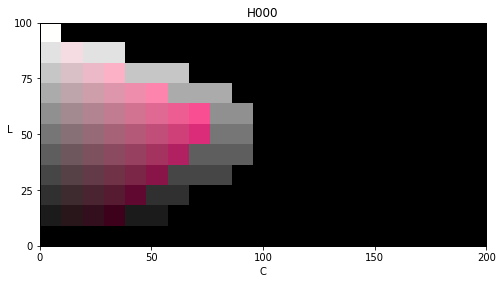

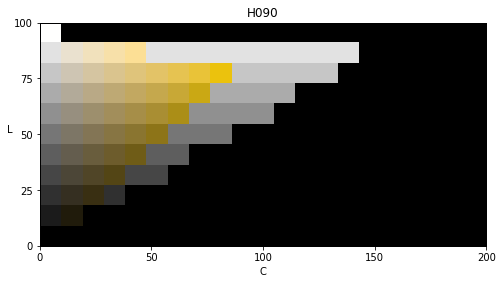

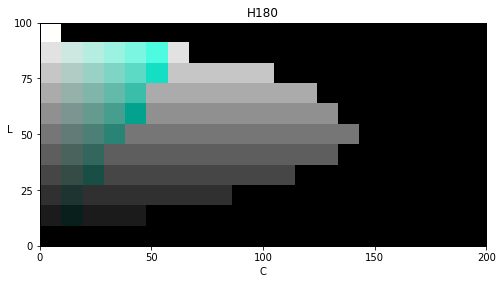

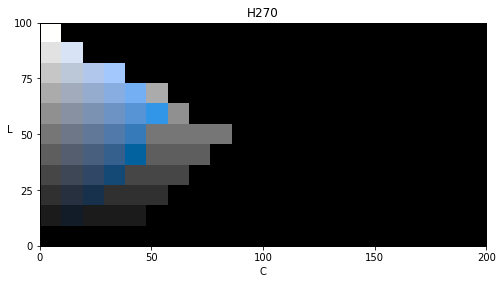

In [18]:
%time slices.LC_planes(H=np.linspace(0,360-90,4),L=[0,100],C=[0,200],res=0.1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dir=plot_dir)

Filling-in missing colours

L = 100.00, C = 200.00, H =  30.00
writing ./slices/LCplane_crop_axon_H030.png
writing ./slices/LCplane_clip_axon_H030.png
CPU times: user 550 ms, sys: 41.6 ms, total: 592 ms
Wall time: 684 ms


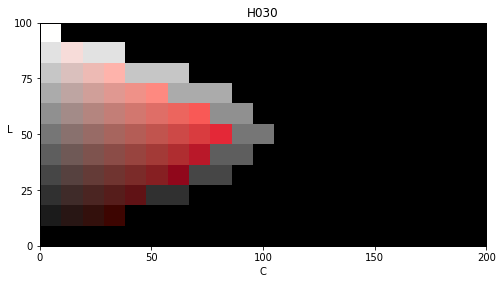

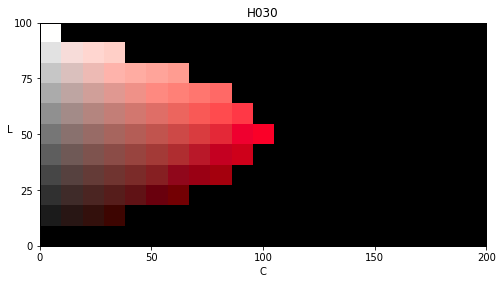

In [19]:
%time arr = slices.LC_plane(H=30,L=[0,100],C=[0,200],res=0.1,modes=['crop','clip'],axes=['on'],figsize=figsize,dir=plot_dir)

Increasing the resolution

L = 100.00, C = 200.00, H =  30.00
writing ./slices/LCplane_crop_axon_H030.png
writing ./slices/LCplane_clip_axon_H030.png
CPU times: user 15.1 s, sys: 2.55 s, total: 17.6 s
Wall time: 22.4 s


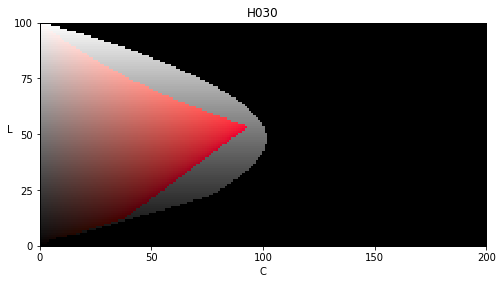

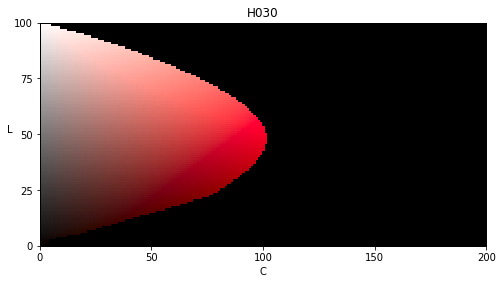

In [20]:
%time arr = slices.LC_plane(H=30,L=[0,100],C=[0,200],res=1,modes=['crop','clip'],axes=['on'],showfig=True,figsize=figsize,dir=plot_dir)

### Stretched to Cmax

These shapes may be stretched to fill square patches, by normalizing C to the Cmax at each L (when ```stretch=True``` parameter ```C``` is expressed as a percentage). This makes them more convenient for use as a colour picker.

L = 100.00, C =   0.00, H =  30.00
writing ./slices/LCplane_stretch_crop_axon_H030.png
CPU times: user 15.4 s, sys: 2.43 s, total: 17.8 s
Wall time: 22 s


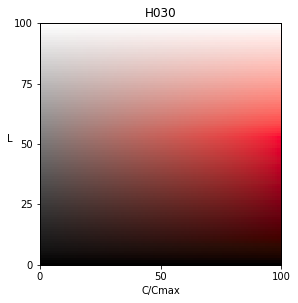

In [21]:
%time arr = slices.LC_plane(H=30,L=[0,100],C=[0,100],stretch=True,res=1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dir=plot_dir)

L =  75.00, C =  71.35, H =  30.00
writing ./slices/LCplane_stretch_crop_axon_H030.png
CPU times: user 4.16 s, sys: 688 ms, total: 4.85 s
Wall time: 6.3 s


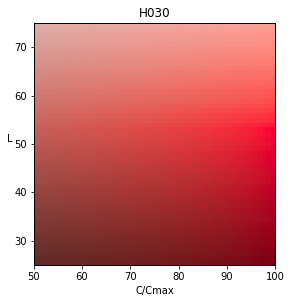

In [22]:
%time arr = slices.LC_plane(H=30,L=[25,75],C=[50,100],stretch=True,res=1,modes=['crop'],axes=['on'],showfig=True,figsize=figsize,dir=plot_dir)

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img align="left" alt="Creative Commons License" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br>
<br>Gilles Ferrand
<br>2019-12-09